In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import missingno as msno
from sklearn.impute import SimpleImputer

# import arviz as az
# import pymc3 as pm
# from theano import tensor as tt

from fitter import Fitter, get_common_distributions, get_distributions
# import mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from scipy import signal

from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest

from sklearn.experimental import enable_iterative_imputer
from sklearn import linear_model

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

In [2]:
print(os.getcwd())

df = pd.read_csv('C:/Users/norri/Desktop/hain_pre_pivot_2.csv')
df.describe()
df.info()

C:\Users\norri\DataspellProjects\mercury-ds\attribution\MMM
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139453 entries, 0 to 139452
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Media_Tyoe    139453 non-null  object
 1   Week_Ending   139453 non-null  object
 2   Impressions   139453 non-null  object
 3   Working_Cost  139453 non-null  object
dtypes: object(4)
memory usage: 4.3+ MB


C:\Users\norri\AppData\Local\Temp\ipykernel_21876\765099049.py:3: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/norri/Desktop/hain_pre_pivot_2.csv')


In [ ]:
# # df_mean = df.copy(deep=True)
# df_mean = df.drop(['DATE'], axis=1)
# mean_imputer = SimpleImputer(strategy="mean")
# df_mean['Dig_Coup_Cost'] = mean_imputer.fit_transform(df_mean['Dig_Coup_Cost'].values.reshape(-1,1))
# df_mean['Dig_Coupon_Imp'] = mean_imputer.fit_transform(df_mean['Dig_Coupon_Imp'].values.reshape(-1,1))
# df_mean['Dig_Demo_Cost'] = mean_imputer.fit_transform(df_mean['Dig_Demo_Cost'].values.reshape(-1,1))
# df_mean['Dig_Demo_Imp'] = mean_imputer.fit_transform(df_mean['Dig_Demo_Imp'].values.reshape(-1,1))
# df_mean['LCM_Cost'] = mean_imputer.fit_transform(df_mean['LCM_Cost'].values.reshape(-1,1))
# df_mean['LCM_Imp'] = mean_imputer.fit_transform(df_mean['LCM_Imp'].values.reshape(-1,1))
# df_mean['Paid_Search_Cost'] = mean_imputer.fit_transform(df_mean['Paid_Search_Cost'].values.reshape(-1,1))
# df_mean['Paid_Search_Imp'] = mean_imputer.fit_transform(df_mean['Paid_Search_Imp'].values.reshape(-1,1))
# df_mean['Signage_Imp'] = mean_imputer.fit_transform(df_mean['Signage_Imp'].values.reshape(-1,1))
# df_mean['Signage Cost'] = mean_imputer.fit_transform(df_mean['Signage Cost'].values.reshape(-1,1))
# df_mean['Total_Imp'] = mean_imputer.fit_transform(df_mean['Total_Imp'].values.reshape(-1,1))
# df_mean['Total_Working_Cost'] = mean_imputer.fit_transform(df_mean['Total_Working_Cost'].values.reshape(-1,1))
#
# print(df_mean)

In [38]:
# Imputing with MICE


# df_knn = df.filter(['Dig_Coupon_Imp', 'Dig_Coup_Cost',		'Dig_Demo_Cost',	'LCM_Imp',	'LCM_Cost',	'Paid_Search_Imp',	'Paid_Search_Cost',	'Signage_Imp',	'Signage Cost',	'Total_Imp',	'Total_Working_Cost'
#                      ], axis=1).copy()
#
# # df_knn = df.filter(['Distance','MaxSpeed','AvgSpeed','AvgMovingSpeed'], axis=1).copy()
#
# # Define scaler to set values between 0 and 1
#
# scaler = MinMaxScaler(feature_range=(0, 1))
# df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)
#
# # Define KNN imputer and fill missing values
# knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)


In [3]:
segment = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical variables\n'.format(len(segment)))
print('The categorical variables are :\n\n', segment)
print('The percentage missing of each of the categorical variables is:\n')
print(df[segment].isnull().sum() * 100/ len(df))
print('The count of non-nulls for each of the categorical variables is:\n')
df_cat = df.select_dtypes(include=object)
df_cat.info()


There are 4 categorical variables

The categorical variables are :

 ['Media_Tyoe', 'Week_Ending', 'Impressions', 'Working_Cost']
The percentage missing of each of the categorical variables is:

Media_Tyoe      0.0
Week_Ending     0.0
Impressions     0.0
Working_Cost    0.0
dtype: float64
The count of non-nulls for each of the categorical variables is:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139453 entries, 0 to 139452
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Media_Tyoe    139453 non-null  object
 1   Week_Ending   139453 non-null  object
 2   Impressions   139453 non-null  object
 3   Working_Cost  139453 non-null  object
dtypes: object(4)
memory usage: 4.3+ MB


In [4]:
integer = [var for var in df.columns if df[var].dtype == 'int64']
print('There are {} integer variables\n'.format(len(integer)))
print('The integer variables are :\n\n', integer)
print(df[integer].isnull().sum())
df_int = df.select_dtypes(include=int)
if len(df_int.columns) > 0.0:
    df_int.info()
    df_int.describe()

There are 0 integer variables

The integer variables are :

 []
Series([], dtype: float64)


In [5]:
fp = [var for var in df.columns if df[var].dtype == 'float64']
print('There are {} float variables\n'.format(len(fp)))
print('The float variables are :\n\n', fp)
fp_na = df[fp].isnull().sum() / len(df) * 100
print(fp_na[fp_na > 10])
fp_zero = df[fp].sum()
print(fp_zero[fp_zero == 0.0])

There are 0 float variables

The float variables are :

 []
Series([], dtype: float64)
Series([], dtype: float64)


In [6]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Impressions', dpi=100):
    plt.figure(figsize=(18, 7), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
plot_df(df, df['DATE'], df['Impressions'], title='Impressions Over Time')

KeyError: 'DATE'

In [12]:
table = pd.pivot_table(df, values=['Impressions', 'Working_Cost'], index=['Week_Ending'],
                       columns='Media_Type', aggfunc=np.sum)

KeyError: 'Media_Type'

In [43]:
segment = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} numerical/continuous variables\n'.format(len(segment)))
print('The numerical/continuous variables are :\n\n', segment)
print(df[segment].isnull().sum() / len(df))
df.info()
df.describe()
print(df.nunique())

There are 6 numerical/continuous variables

The numerical/continuous variables are :

 ['Media_Type', 'Media_Platform', 'Media_Placement', 'Campaign_Name', 'Start_DATE', 'DATE']
Media_Type         0.000000
Media_Platform     0.001377
Media_Placement    0.000380
Campaign_Name      0.000000
Start_DATE         0.998157
DATE               0.000000
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139453 entries, 0 to 139452
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Media_Type       139453 non-null  object 
 1   Media_Platform   139261 non-null  object 
 2   Media_Placement  139400 non-null  object 
 3   Campaign_Name    139453 non-null  object 
 4   Start_DATE       257 non-null     object 
 5   DATE             139453 non-null  object 
 6   Days_Diff        257 non-null     float64
 7   Impressions      139453 non-null  int64  
 8   Working_Cost     139453 non-null  int64  
dtypes: floa

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_num = df.select_dtypes(exclude='object')
df_num.describe()

,Days_Diff,Impressions,Working_Cost
count,257.000000,1.394530e+05,139453.000000
mean,12.735409,7.078555e+03,31.145217
std,17.412954,1.869937e+05,1001.303803
min,1.000000,0.000000e+00,0.000000
25%,6.000000,0.000000e+00,0.000000
50%,6.000000,0.000000e+00,0.000000
75%,6.000000,6.000000e+00,1.000000
max,147.000000,2.070181e+07,205192.000000


,Days_Diff,Impressions,Working_Cost
count,3.000000,3.000000,3.000000
mean,0.536667,0.360000,0.576667
std,0.516366,0.557494,0.452364
min,-0.020000,-0.020000,0.100000
25%,0.305000,0.040000,0.365000
50%,0.630000,0.100000,0.630000
75%,0.815000,0.550000,0.815000
max,1.000000,1.000000,1.000000


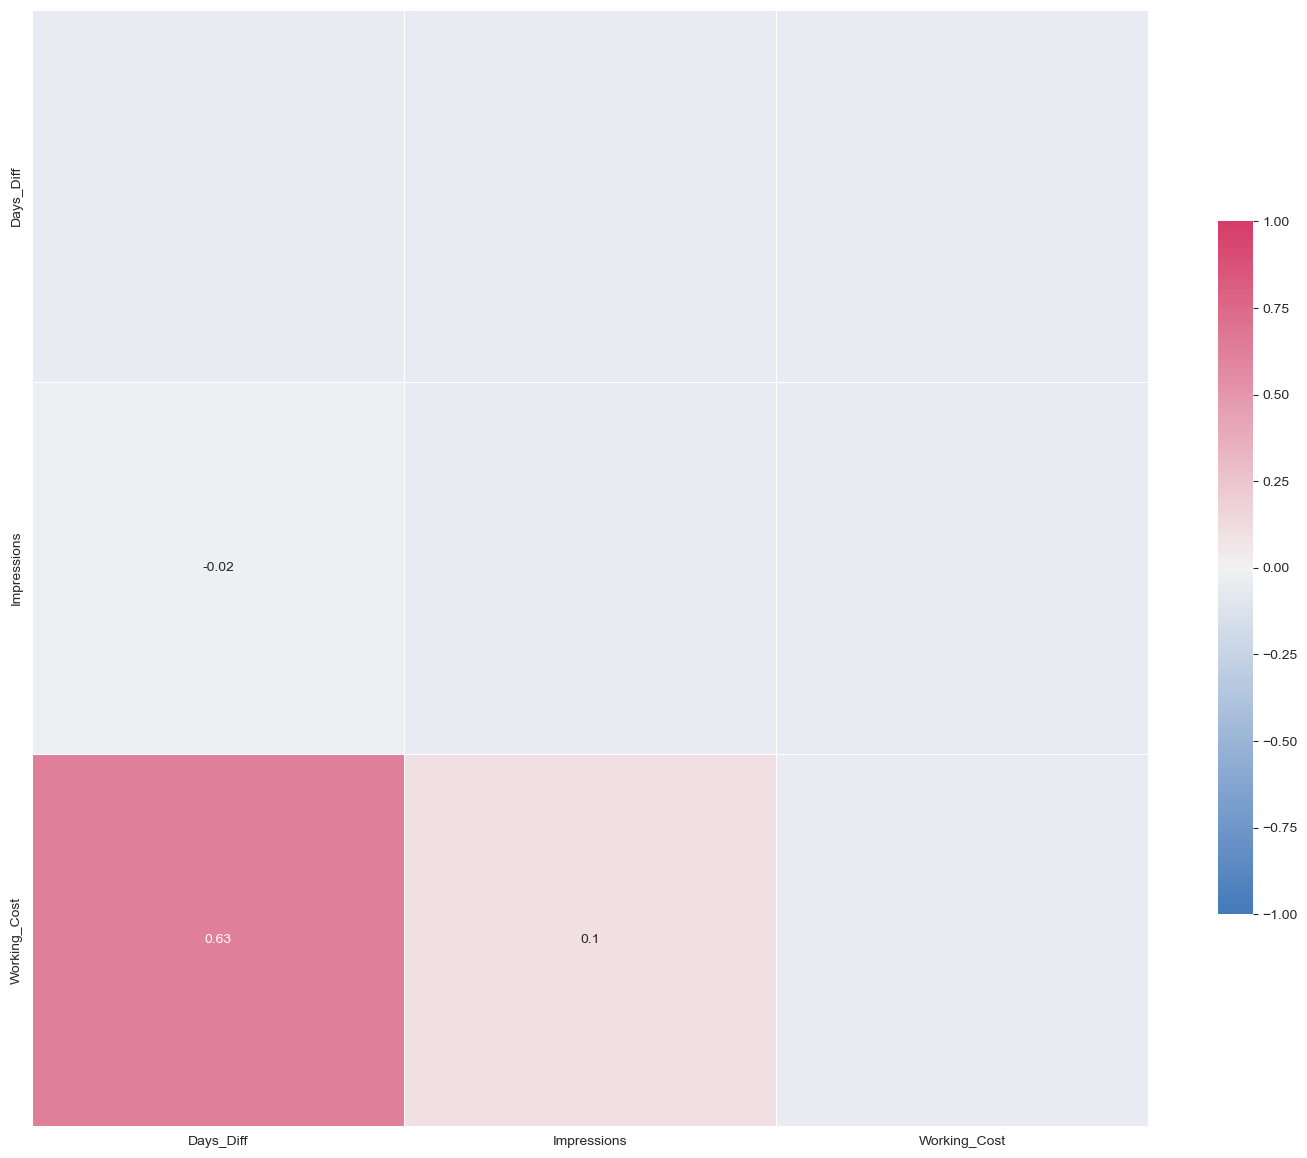

In [45]:
corr = df_num.corr(method="spearman").round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(250, 1, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr.describe()

In [46]:
# use VIF along with variable importance to check new dataframes
vif_df = df_num[~df_num.isin([np.nan, np.inf, -np.inf]).any(1)]

X = vif_df
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print(vif_data)

        feature       VIF
0     Days_Diff  1.592278
1   Impressions  1.858129
2  Working_Cost  2.387146


C:\Users\norri\AppData\Local\Temp\ipykernel_22508\2375102331.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  vif_df = df_num[~df_num.isin([np.nan, np.inf, -np.inf]).any(1)]


,Days_Diff,Impressions,Working_Cost
count,3.000000,3.000000,3.000000
mean,0.536667,0.496667,0.713333
std,0.516366,0.510131,0.255408
min,-0.020000,-0.020000,0.510000
25%,0.305000,0.245000,0.570000
50%,0.630000,0.510000,0.630000
75%,0.815000,0.755000,0.815000
max,1.000000,1.000000,1.000000


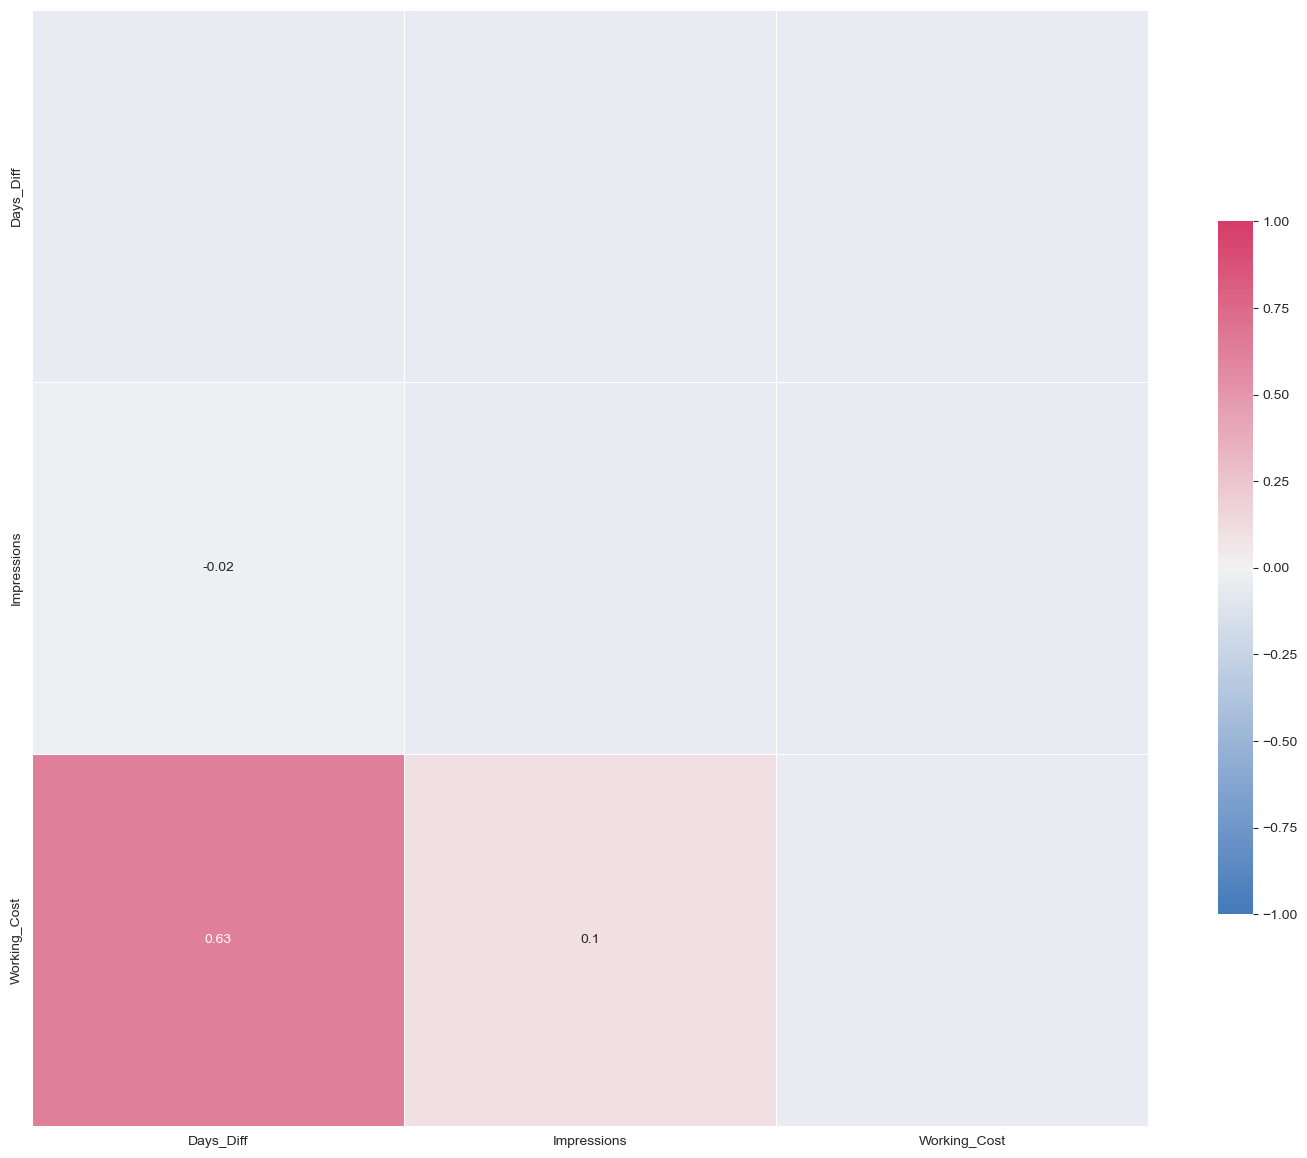

In [47]:
corr_vif = vif_df.corr(method="spearman").round(2)
mask = np.triu(np.ones_like(corr_vif, dtype=bool))
plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette(250, 1, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr_vif.describe()

In [48]:
# adf_test = ADFTest(alpha = .05)
# adf_test.should_diff(df['Total_Imp'])

KeyError: 'Total_Imp'

C:\Users\norri\AppData\Local\Temp\ipykernel_16800\2740466491.py:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax=axes[0, 2], x='Dig_Demo_Cost', data=df_num)


ValueError: Could not interpret value `Signage_Cost` for parameter `x`

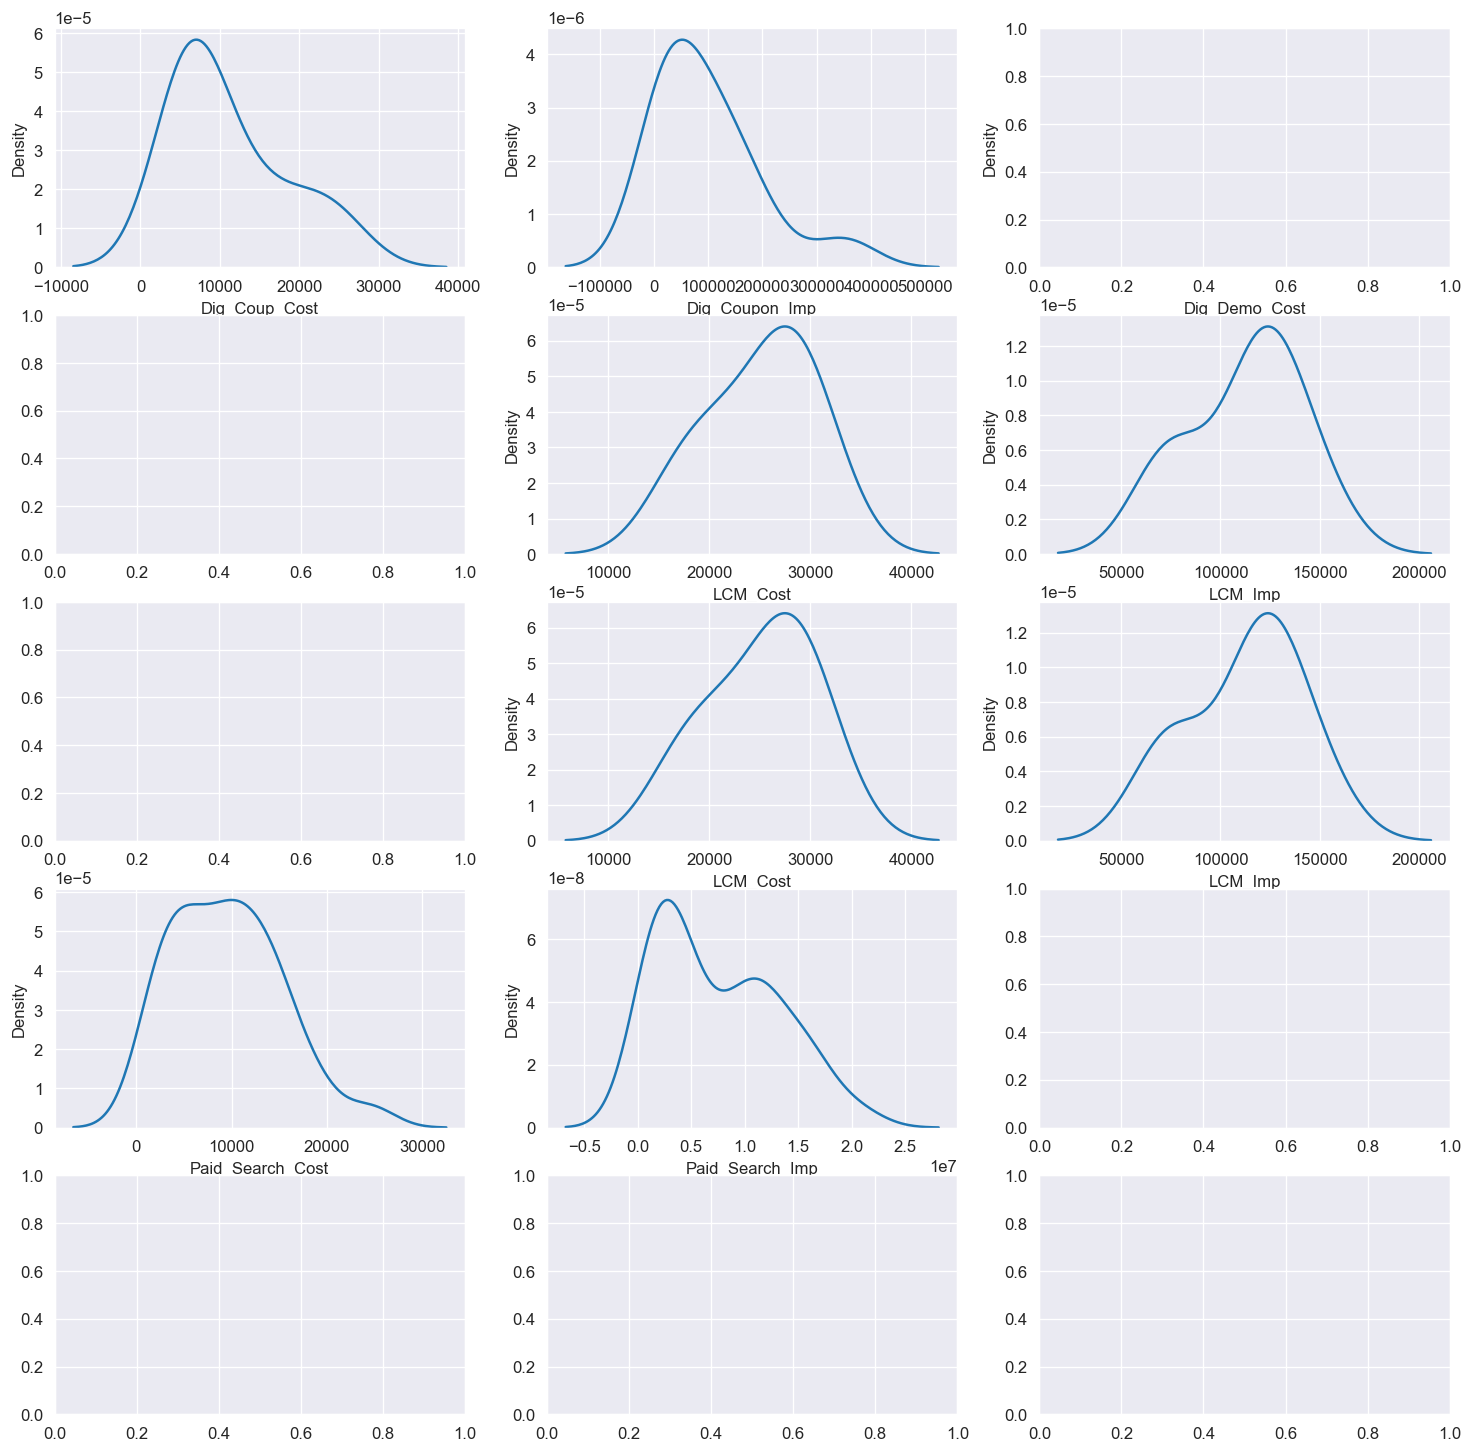

In [110]:
figure, axes = plt.subplots(5, 3, figsize=(15, 15))
sns.kdeplot(ax=axes[0, 0], x='Dig_Coup_Cost', data=df_num)
sns.kdeplot(ax=axes[0, 1], x='Dig_Coupon_Imp', data=df_num)
sns.kdeplot(ax=axes[0, 2], x='Dig_Demo_Cost', data=df_num)
sns.kdeplot(ax=axes[1, 0], x='Dig_Demo_Imp', data=df_num)
sns.kdeplot(ax=axes[1, 1], x='LCM_Cost', data=df_num)
sns.kdeplot(ax=axes[1, 2], x='LCM_Imp', data=df_num)
sns.kdeplot(ax=axes[2, 0], x='Dig_Demo_Imp', data=df_num)
sns.kdeplot(ax=axes[2, 1], x='LCM_Cost', data=df_num)
sns.kdeplot(ax=axes[2, 2], x='LCM_Imp', data=df_num)
sns.kdeplot(ax=axes[3, 0], x='Paid_Search_Cost', data=df_num)
sns.kdeplot(ax=axes[3, 1], x='Paid_Search_Imp', data=df_num)
sns.kdeplot(ax=axes[3, 2], x='Signage_Cost', data=df_num)
sns.kdeplot(ax=axes[4, 0], x='Signage_Imp', data=df_num)
sns.kdeplot(ax=axes[4, 1], x='Total_Imp', data=df_num)
sns.kdeplot(ax=axes[4, 2], x='Total_Working_Cost', data=df_num)
plt.show()

Selecting from the most likely distributions of the data,
finds the most likely distribution for the data, its parameters,
and is useful for any data transformations.

In [49]:
dist_list = ['gamma', 'expon', 'cauchy', 'norm', 'uniform']

for var in df:
    dist_test = df[var].dropna()
    dist_test = dist_test.values
    f = Fitter(dist_test, distributions=dist_list, timeout=60)
    f.fit()
    print(var)
    print(f.summary(plot=False))
    print(f.get_best(method='sumsquare_error'))

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [50]:
detrended = signal.detrend(df['Total_Imp'].values)
plt.rcParams.update({'figure.figsize': (12,4)})
plt.plot(detrended)
plt.title('Sales Detrended', fontsize=16)

KeyError: 'Total_Imp'

In [51]:
result_mul = seasonal_decompose(df['Total_Imp'].values, model='multiplicative', period=52)
deseasonalized = df['Total_Imp'].values / result_mul.seasonal
plt.plot(deseasonalized)
plt.title('Impressions Deseasonalized', fontsize=16)
plt.plot()

KeyError: 'Total_Imp'

In [52]:
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':120})
autocorrelation_plot(df['Total_Imp'].tolist())

KeyError: 'Total_Imp'

In [ ]:
# this section should come later; for larger datasets takes too long to run
# with too little return in information
cols = 3
rows = 4
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize=(cols * 5, rows * 5))
for i, col in enumerate(num_cols):
    ax = fig.add_subplot(rows, cols, i + 1)
    sns.histplot(x=df[col], ax=ax)
fig.tight_layout()
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x0000028831D16790> (for post_execute):


In [142]:
df.to_csv('df_mean.csv', encoding='utf-8', index=False)

ValueError: Wrong number of items passed 0, placement implies 1